<a href="https://colab.research.google.com/github/jain777/Technical-Indicators-FA-Project/blob/main/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
#import pyEX as p
ticker = 'AMD'
timeframe = '6m'
hdfc=pd.read_csv('/content/HDFCBANK.NS.csv')
print(hdfc.shape)

hdfc.index = hdfc["Date"].apply(lambda x: pd.Timestamp(x))
hdfc.drop("Date", axis=1, inplace=True)

hdfc.tail()

(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424
2019-03-27,1159.275024,1164.025024,1139.525024,1149.724976,1140.085938,6942650
2019-03-28,1149.400024,1162.500000,1143.925049,1151.400024,1141.746826,9777164


In [5]:
!pip install yfinance
!pip install ta


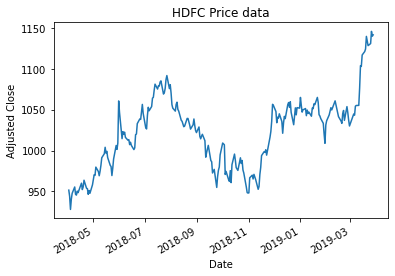

In [6]:
import yfinance as yf
import ta
from datetime import date, timedelta, datetime
from IPython.display import clear_output
#Visually show the stock price
hdfc['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("HDFC Price data")
plt.show()

In [7]:
import pandas

def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Adj Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [14]:
rsi(hdfc)

Date
2018-04-02          NaN
2018-04-03          NaN
2018-04-04          NaN
2018-04-05          NaN
2018-04-06          NaN
                ...    
2019-03-22    72.279103
2019-03-25    72.880380
2019-03-26    76.133136
2019-03-27    72.428376
2019-03-28    72.829205
Name: Adj Close, Length: 246, dtype: float64

In [12]:
pip install pandas_ta

     |████████████████████████████████| 115 kB 5.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=c0f1662cb7b67f6afab8f144753b93cc5b0d93bd96bf9709509d8d3aaacbbbfb
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


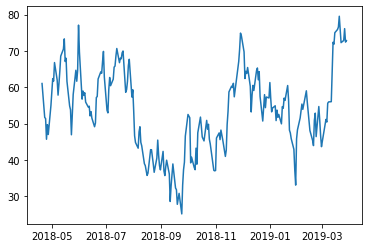

In [21]:
import pandas_ta as pta
a = pta.rsi(hdfc['Adj Close'], length = 14)

plt.plot(a)

#explore the drift parameter